<a href="https://colab.research.google.com/github/NathanPhilipB/EV_Market_Analysis_NathanPhilipB/blob/main/Nathan_SB_23_11_4_Task2_EV_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dependencies and Data

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [62]:
df1 = pd.DataFrame(pd.read_csv("/content/NathanPhilipB_vehicle_data1.csv"))

In [63]:
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [64]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Brand: ['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
Unique values in Model: ['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' 'el-Born ' 'Zoe ZE50 R135' 'EQA ' 'Model S Long Range'
 'Kona Electric 39 kWh' 'e-tron Sportba

In [65]:
df2 = pd.DataFrame(pd.read_csv("/content/NathanPhilipB_CARS_data2.csv"))

In [66]:
df2

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.00,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.80,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.00,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.00,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.00,2750,172.45,3500
5,Toyota Fortuner,99,Diesel,2755,4,7.0,Automatic,80.0,SUV,4.5,3240000,4957000,500.00,2800,201.15,3400
6,Hyundai Creta,731,Diesel,1493,4,5.0,Automatic,50.0,SUV,4.5,1044000,1818000,250.00,2750,113.45,4000
7,Tata Punch,381,Petrol,1199,3,5.0,Automatic,37.0,SUV,4.5,593000,949000,113.00,3400,84.48,6000
8,Mahindra Bolero,107,Diesel,1498,3,7.0,Manual,60.0,SUV,4.5,933000,1026000,210.00,2200,74.96,3600
9,Maruti Swift,205,Petrol,1197,4,5.0,Automatic,37.0,Hatchback,4.0,592000,885000,113.00,4400,88.50,6000


In [67]:
df3 = pd.DataFrame(pd.read_excel("/content/Ev Sales.xlsx"))

In [68]:
df3

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141
5,2017-09-01,109,7414,193,0,7716
6,2017-10-01,160,7250,214,0,7624
7,2017-11-01,214,9598,186,11,10009
8,2017-12-01,189,8719,179,0,9087
9,2018-01-01,176,8750,210,29,9165


In [69]:
df3.columns

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')

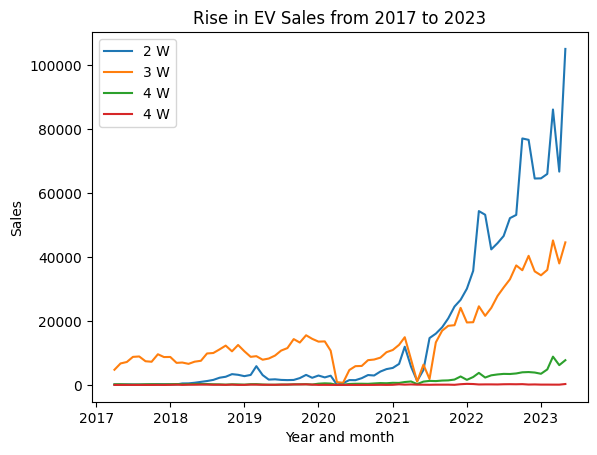

In [70]:
plt.plot(df3['YEAR'], df3['2 W'], label='2 W')
plt.plot(df3['YEAR'], df3['3 W'], label='3 W')
plt.plot(df3['YEAR'], df3['4 W'], label='4 W')
plt.plot(df3['YEAR'], df3['BUS'], label='4 W')

# Adding labels and legend
plt.xlabel('Year and month')
plt.ylabel('Sales')
plt.legend()
plt.title('Rise in EV Sales from 2017 to 2023')

# Display the plot
plt.show()

#Electric twowheelers seem to have risen the most in sales. while fourwheelers seem to have had only a slight increase in sales in the last 3 years.

#Exploratory Data Analysis

##EV car data

In [71]:
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


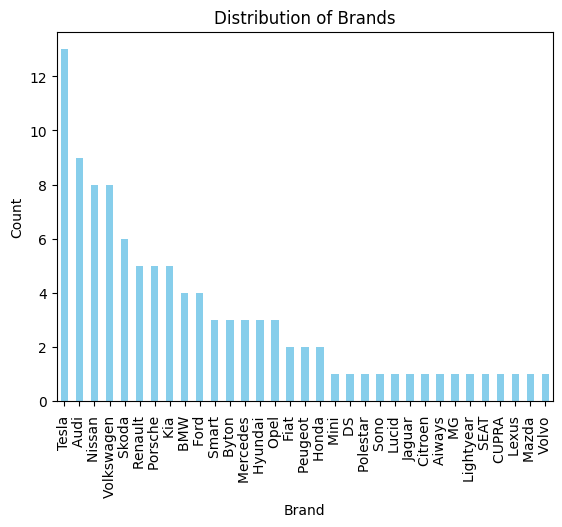

In [72]:
brand_counts = df1['Brand'].value_counts()

# Plotting a bar chart
brand_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Brands')

# Display the plot
plt.show()

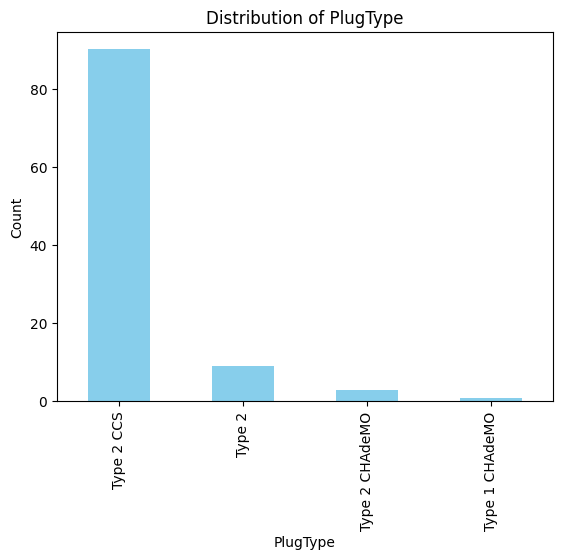

In [73]:
brand_counts = df1['PlugType'].value_counts()

# Plotting a bar chart
brand_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('PlugType')
plt.ylabel('Count')
plt.title('Distribution of PlugType')

# Display the plot
plt.show()

##Behavioural Data

In [74]:
df4 = pd.read_csv("/content/behavioural_segment_data.csv")

In [75]:
df4

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
5,28,Salaried,Married,Graduate,3,Yes,900000,700000
6,31,Salaried,Married,Graduate,4,No,1800000,1200000
7,33,Business,Married,Post Graduate,4,No,1400000,700000
8,34,Business,Married,Post Graduate,4,No,2000000,1100000
9,34,Salaried,Married,Graduate,3,Yes,1900000,800000


##Charging Station Data

In [76]:
df5 = pd.read_excel("/content/charging_station_data.xlsx")
df5

,State/ UTs,No. of charging stations
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


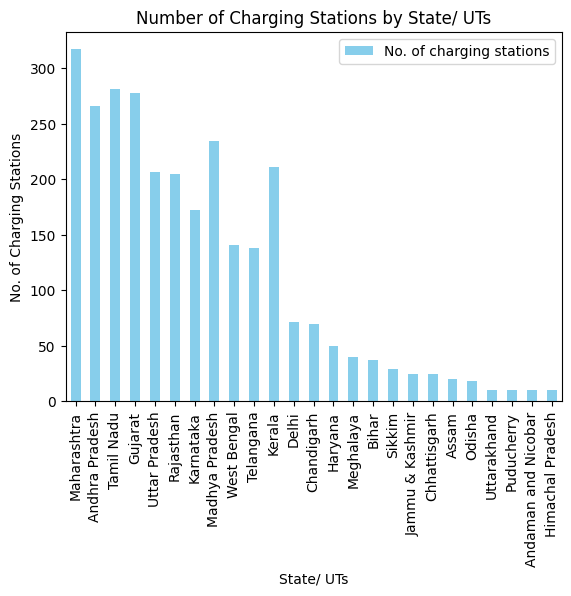

In [77]:
df5.plot(kind='bar', x='State/ UTs', y='No. of charging stations', color='skyblue')

# Adding labels and title
plt.xlabel('State/ UTs')
plt.ylabel('No. of Charging Stations')
plt.title('Number of Charging Stations by State/ UTs')

# Display the plot
plt.show()

In [78]:
df6 = pd.read_csv("/content/ev_charging_station_list.csv")
df6

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service
5,6,NDMC,"Dharma Marg, Block Y, Diplomatic Enclave, Malc...","Electric Vehicle Charger, Dharma Marg, Block Y...",28.602356,77.186618,DC-001,15 kW,Self Service
6,7,NDMC,"Outside Westend Vedi Tailors, Bock M, Middle C...","Electric Vehicle Charger, Outside Westend Vedi...",28.633686,77.218140,DC-001,15 kW,Self Service
7,8,NDMC,"Near NDMC Office, Fire Brigade Lane, Barakhamb...","Electric Vehicle Charger, Near NDMC Office, Fi...",28.630448,77.225558,DC-001,15 kW,Self Service
8,9,NDMC,"Near Bikanervala, Yashwant Place, Chanakyapuri...","Electric Vehicle Charger, Near Bikanervala, Ya...",28.583883,77.163408,DC-001,15 kW,Self Service
9,10,NDMC,"Khan Market, Rabindra Nagar, New Delhi- 110003","Electric Vehicle Charger, Khan Market, Rabindr...",28.600333,77.226889,DC-001,15 kW,Self Service


In [79]:
df7 = pd.DataFrame(pd.read_excel("/content/ev_charger_data.xlsx"))

In [80]:
df7

,State,City,Location,Types of chargers installed/ Connector
0,Goa,Goa,EESL EDC Parking Goa,CCS/ChADEMO/ Type 2 AC
1,Delhi,Delhi,"SDMC Parking, R Block, GK-1, DELHI-110016",AC-001
2,Delhi,Delhi,"SDMC Parking, SDA Market, Hauz Khas, New Delhi...",AC-001
3,Delhi,Delhi,"EESL Feroze Gandhi Road, Lajpat Nagar, SDMC pa...",DC-001
4,Delhi,Delhi,"EESL PVR Priya Vasant Vihar, SDMC parking New ...",DC-001
5,Delhi,Delhi,"EESL Meharchand Double Storey Market, SDMC par...",DC-001
6,Kerala,Thiruvananthapura m,"Sanghumukham DTPC office, Shanghumukham beach,...",DC-001
7,Kerala,Thiruvananthapura m,"State Council For Child Welfare, CV Raman Pill...",DC-001
8,Delhi,Delhi,"EESL Veer Savarkar Marg, Lajpat Nagar, SDMC pa...",DC-001
9,Haryana,Panchkula,"HAREDA, Akshay Urja Bhawan , Institutional plo...",DC-001


In [81]:
df8 = df7.drop_duplicates().reset_index().drop('index', axis=1)
#Removing duplicate rows

In [82]:
df8

,State,City,Location,Types of chargers installed/ Connector
0,Goa,Goa,EESL EDC Parking Goa,CCS/ChADEMO/ Type 2 AC
1,Delhi,Delhi,"SDMC Parking, R Block, GK-1, DELHI-110016",AC-001
2,Delhi,Delhi,"SDMC Parking, SDA Market, Hauz Khas, New Delhi...",AC-001
3,Delhi,Delhi,"EESL Feroze Gandhi Road, Lajpat Nagar, SDMC pa...",DC-001
4,Delhi,Delhi,"EESL PVR Priya Vasant Vihar, SDMC parking New ...",DC-001
5,Delhi,Delhi,"EESL Meharchand Double Storey Market, SDMC par...",DC-001
6,Kerala,Thiruvananthapura m,"Sanghumukham DTPC office, Shanghumukham beach,...",DC-001
7,Kerala,Thiruvananthapura m,"State Council For Child Welfare, CV Raman Pill...",DC-001
8,Delhi,Delhi,"EESL Veer Savarkar Marg, Lajpat Nagar, SDMC pa...",DC-001
9,Haryana,Panchkula,"HAREDA, Akshay Urja Bhawan , Institutional plo...",DC-001


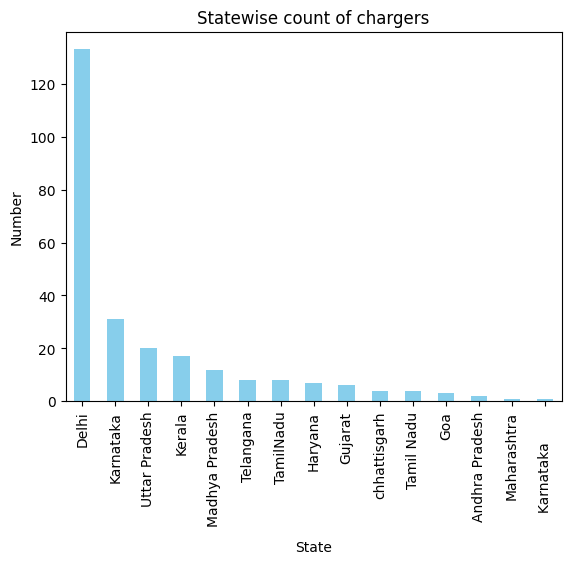

In [83]:
state_counts = df8['State'].value_counts()

# Plotting a bar chart
state_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number')
plt.title('Statewise count of chargers')

# Display the plot
plt.show()

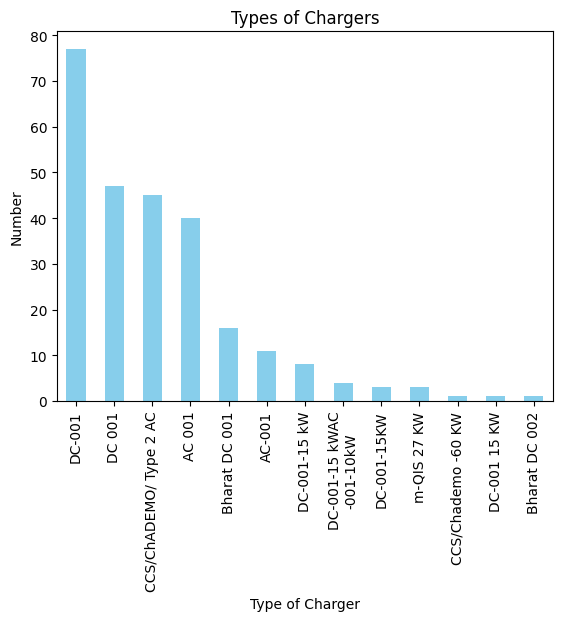

In [84]:
state_counts = df8['Types of chargers installed/ Connector'].value_counts()

# Plotting a bar chart
state_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Type of Charger')
plt.ylabel('Number')
plt.title('Types of Chargers')

# Display the plot
plt.show()

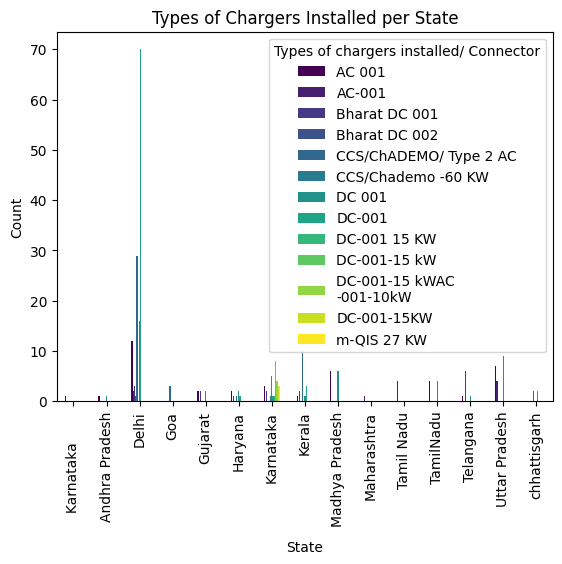

In [85]:
grouped_df = df8.groupby(['State', 'Types of chargers installed/ Connector']).size().unstack(fill_value=0)

# Plotting a grouped bar chart with side-by-side bars
grouped_df.plot(kind='bar', colormap='viridis')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Types of Chargers Installed per State')

# Display the plot
plt.show()

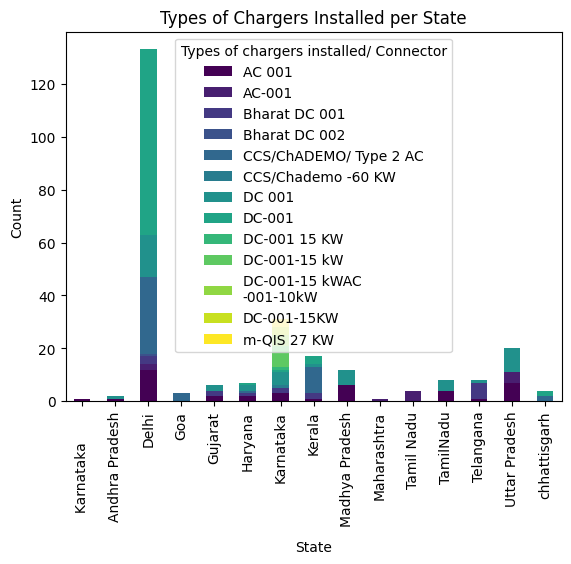

In [86]:
grouped_df = df8.groupby(['State', 'Types of chargers installed/ Connector']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
grouped_df.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Types of Chargers Installed per State')

# Display the plot
plt.show()

#MARKET ANALYSIS

In [87]:
# encoding the categorical features

# PowerTrain feature
df1['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)


In [88]:
df1

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,2,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,0,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,2,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,0,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,1,2,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,1,1,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,1,1,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,1,0,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,1,2,Type 2 CCS,SUV,D,5,55000


In [89]:
# Replace '-' with NaN and then drop rows containing NaN
df1.replace('-', pd.NA, inplace=True)
df1.dropna(inplace=True)

# Display the DataFrame without rows containing '-'
df1.reset_index().drop('index', axis=1)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,2,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,0,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,2,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,0,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,1,2,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,1,1,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,1,1,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,1,0,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,1,2,Type 2 CCS,SUV,D,5,55000


In [90]:
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [99]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.90186716e-01,  1.19335706e+00, -9.65395369e-01,
         2.41350982e+00,  8.48942694e-01,  0.00000000e+00,
         5.96815533e-02, -5.40759055e-02,  1.03531715e+00],
       [ 1.19499598e+00, -5.03240000e-01, -7.64740552e-01,
        -1.03246852e+00, -6.81496665e-01,  0.00000000e+00,
         5.96815533e-02, -8.01008343e-01, -1.56624903e+00],
       [-9.49720370e-01,  6.58812780e-01, -2.96545980e-01,
         8.15374938e-01,  4.23820650e-01,  0.00000000e+00,
         5.96815533e-02, -2.59340240e-02,  1.03531715e+00],
       [-9.99270998e-02, -3.84188878e-02,  5.39515758e-01,
         5.15724648e-01,  8.37230148e-02,  0.00000000e+00,
         5.96815533e-02,  3.14113710e-01, -1.56624903e+00],
       [ 9.92664248e-01, -8.51855834e-01, -7.31298083e-01,
        -1.33211880e+00, -1.53174075e+00,  0.00000000e+00,
        -1.40251650e+00, -7.13152907e-01, -1.56624903e+00],
       [-1.71858095e+00,  1.58845500e+00, -3.29988449e-01,
         8.15374938e-01,  2.20933324e+00,  0.000000

In [100]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.296219,-0.738763,1.226343,1.079642,-1.257618,0.509706,0.668492,-0.429463,-1.634044e-17
1,-2.395106,-0.187733,0.660739,-0.449574,0.331423,-0.478017,-0.200272,-0.325445,-1.478444e-18
2,1.420148,-0.154837,0.165822,0.812359,-0.681798,0.349991,-0.155434,-0.069265,-1.543541e-17
3,0.037943,-0.105593,0.631667,-1.552831,-0.048255,-0.420790,0.290251,0.210643,2.387071e-17
4,-2.954083,-1.249162,-0.519689,-0.674280,-0.083298,-0.478167,-0.208847,-0.066641,3.202691e-17


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

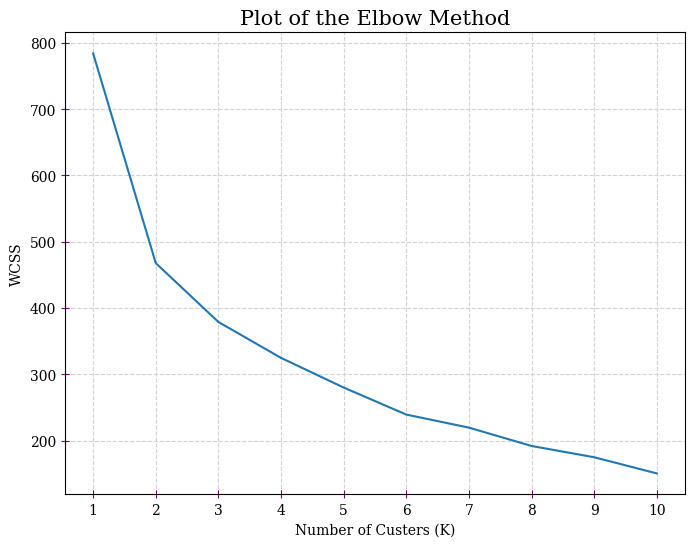

In [101]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [102]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=90)

In [103]:
# check the labels assigned to each data point
print(kmean.labels_)

[0 1 2 3 1 0 1 1 3 2 2 1 3 3 1 3 0 1 1 1 1 2 1 0 0 3 3 2 1 1 2 3 1 2 1 3 1
 3 1 2 0 1 2 1 1 3 1 0 3 1 2 0 1 3 2 1 1 1 0 1 2 3 2 3 0 1 2 2 1 2 0 2 1 1
 2 2 0 3 2 3 2 1 2 2 2 3 2 3 2 1 3 1 3 3 2 2 2 2]


In [104]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    34
2    30
3    22
0    12
dtype: int64

In [105]:
# adding a new feature of cluster labels to the dataset 3
df1['clusters'] = kmean.labels_

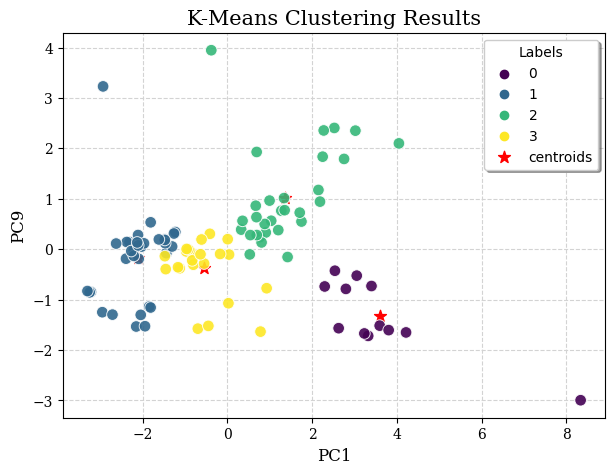

In [110]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()